# Kampus Merdeka 6: IBM & Skilvul
# Artificial Intelligence Phase Challenge

## Kelompok: 45
## Anggota

*   Alif M. Anwar Tambunan
*   Asep Nugraha
*   Egi Saputra
*   RIZKY ANANDA ALAM SYAH DAULAY
*   Azhar Syahid


# Problem Definition
Dalam proyek ini, kita bertujuan untuk menganalisis sentimen ulasan sepatu menggunakan teknik pemrosesan bahasa alami (NLP). Secara spesifik, kita ingin mengklasifikasikan ulasan sebagai positif atau negatif berdasarkan isi teksnya. Tugas ini sangat penting bagi bisnis untuk memahami opini pelanggan dan meningkatkan produk dan layanan mereka.

## Latar Belakang
Dengan meningkatnya e-commerce, ulasan online telah menjadi sumber informasi yang sangat penting bagi pelanggan untuk membuat keputusan pembelian yang informasi. Oleh karena itu, menganalisis sentimen dalam ulasan telah menjadi area penelitian yang signifikan dalam NLP. Dalam proyek ini, kita fokus pada menganalisis sentimen dalam ulasan sepatu, yang merupakan pasar yang populer dan kompetitif.

## Tujuan Penelitian
Tujuan dari penelitian ini adalah untuk mengembangkan dan mengevaluasi kinerja dari berbagai model deep learning untuk analisis sentimen dalam ulasan sepatu. Secara spesifik, kita bertujuan untuk:

- Membandingkan kinerja dari empat model deep learning yang populer: LSTM, RNN, GRU, dan CNN
- Mengidentifikasi model yang paling baik untuk analisis sentimen dalam ulasan sepatu
- Mengevaluasi efektivitas dari setiap model dalam menangkap pola sentimen dalam data teks

## Pertanyaan kunci
- Model deep learning mana yang paling baik untuk analisis sentimen dalam ulasan sepatu?
- Bagaimana kinerja dari setiap model dibandingkan dengan yang lain?
- Dapatkah kita mencapai akurasi yang tinggi dalam analisis sentimen menggunakan model deep learning?

## Data yang akan dipakai
* Nama Dataset : Men_Women_Shoes_Reviews,
* Sumber Dataset : Kaagle,
* Deskripsi Data : Dataset ini berisi informasi tentang sepatu yang meliputi berbagai atribut seperti judul (Title), harga (Price), rating (Rating), deskripsi produk (Product Description), dan tipe sepatu (Shoe Type). Rating merepresentasikan total penilaian yang diberikan oleh pengguna, dengan rentang nilai dari 1 hingga 5. Total Reviews menunjukkan jumlah ulasan yang diterima oleh sepatu tersebut dari pengguna. Kolom Reviews berisi hingga 10 ulasan tentang sepatu, yang dipisahkan oleh tanda '||'. Setiap ulasan memiliki kolom Reviews Rating yang mencantumkan penilaian yang sesuai untuk ulasan tersebut, juga dipisahkan oleh tanda '||'. Dataset ini merupakan hasil dari pengumpulan ulasan produk dari sumber yang tidak disebutkan.

## Jenis Masalah Neural Network
Natural Language Processing (NLP).

## Model
model yang di uji :
1. LSTM (Long Short-Term Memory).
2. RNN (Recurrent Neural Network)
3. GRU (Gated Recurrent Unit)
4. CNN (Convolutional Neural Network)

# Preparation | Persiapan
## Import Libraries

In [ ]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pickle

## Get Data | Mendapatkan Data

In [ ]:
# get data
df = pd.read_csv('dataset/Shoes_Data.csv')

## Explore Data (EDA) | Eksplorasi Data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')|

In [ ]:
# check data
df.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


In [ ]:
# describe data
df.describe()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
count,1230,1230,1230,1230,1230,1230,1230,1230
unique,902,627,30,513,730,951,833,2
top,Flavia Women Running Shoes,₹499.00,4.1 out of 5 stars,25 ratings,The product will be an excellent pick for you....,Verified Purchase,5.0 out of 5 stars,Men
freq,13,31,178,22,29,11,41,856


histogram untuk melihat distribusi rating produk pada dataset.

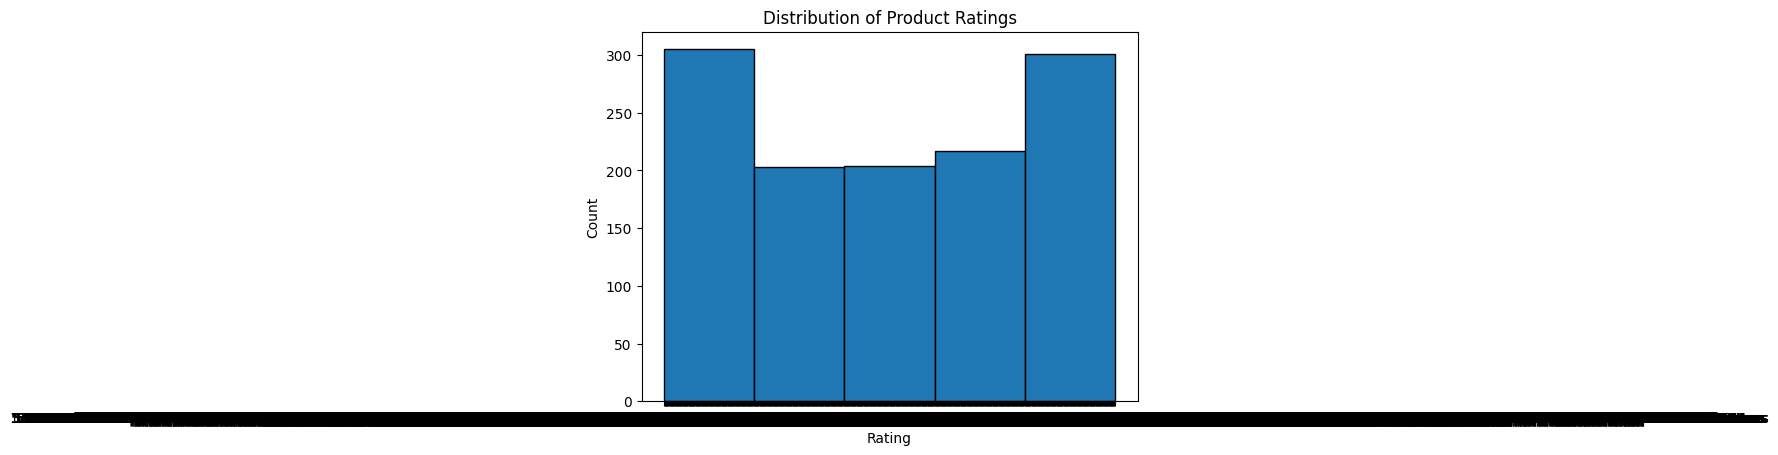

In [ ]:
# perform data visualization
plt.hist(df['reviews_rating'], bins=5, edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Visualisasikan panjang ulasan untuk mendapatkan pemahaman tentang panjang ulasan yang ada dalam dataset.

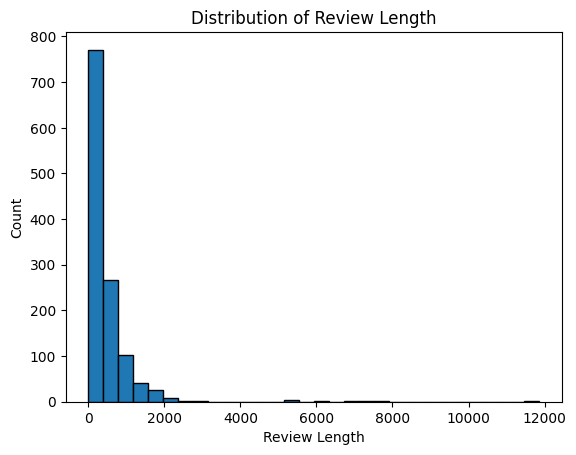

In [ ]:
df['review_length'] = df['product_description'].apply(len)
plt.hist(df['review_length'], bins=30, edgecolor='black')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

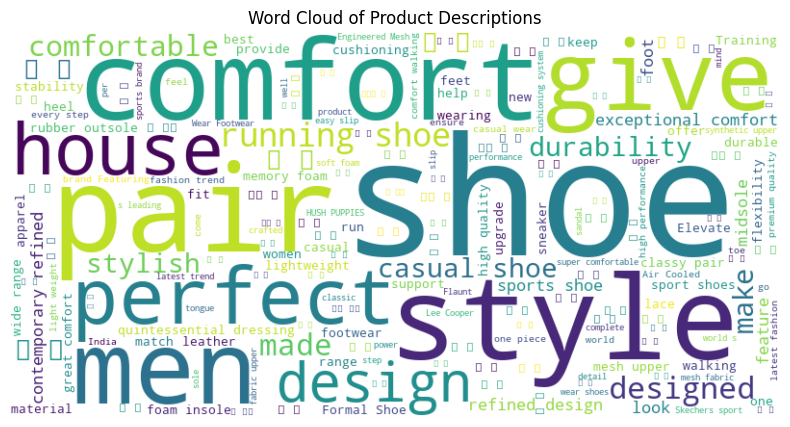

In [ ]:
# Menggunakan word cloud untuk melihat kata-kata yang paling sering muncul dalam deskripsi produk.

text = ' '.join(df['product_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Product Descriptions')
plt.axis('off')
plt.show()


## Preprocess Data | Proses Awal Data

In [ ]:
# melakukan ekstraksi string ke numerik pada kolom rating agar dapat menjadi acuan kolom "sentiment" yang baru.

# Ekstraksi nilai rating dari kolom 'rating'
def extract_rating(text):
    match = re.search(r'\d+\.\d+', text)  # Gunakan regex untuk menemukan nilai desimal dalam teks
    if match:
        return float(match.group())
    else:
        return None  # Jika tidak ada nilai yang ditemukan, kembalikan None

# Terapkan fungsi extract_rating ke setiap entri dalam kolom 'rating'
df['numeric_rating'] = df['rating'].apply(extract_rating)

# Konversi nilai rating ke dalam format numerik
df['numeric_rating'] = pd.to_numeric(df['numeric_rating'])

# Tentukan batas sentimen
threshold = 3

In [ ]:
print(df[['rating', 'numeric_rating']].head(10))

               rating  numeric_rating
0  2.9 out of 5 stars             2.9
1  3.9 out of 5 stars             3.9
2  3.3 out of 5 stars             3.3
3  4.2 out of 5 stars             4.2
4  4.2 out of 5 stars             4.2
5  3.5 out of 5 stars             3.5
6  3.3 out of 5 stars             3.3
7  3.8 out of 5 stars             3.8
8  4.1 out of 5 stars             4.1
9  3.6 out of 5 stars             3.6


In [ ]:
# Buat kolom sentimen berdasarkan nilai rating
df['sentiment'] = df['numeric_rating'].apply(lambda x: 1 if x >= threshold else 0)

In [ ]:
df.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,review_length,numeric_rating,sentiment
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,222,2.9,0
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,78,3.9,1
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,398,3.3,1
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,576,4.2,1
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,1030,4.2,1


In [ ]:
# Drop kolom yang tidak digunakan
df.drop(['title', 'price', 'total_reviews', 'reviews', 'reviews_rating', 'review_length'], axis=1, inplace=True)

In [ ]:
df.head()

,rating,product_description,Shoe Type,numeric_rating,sentiment
0,2.9 out of 5 stars,Elevate your style with this classy pair of Ru...,Men,2.9,0
1,3.9 out of 5 stars,The product will be an excellent pick for you....,Men,3.9,1
2,3.3 out of 5 stars,Flaunt with these stylish and unique red casua...,Men,3.3,1
3,4.2 out of 5 stars,Robbie Jones Shoes Are Designed To Keeping In ...,Men,4.2,1
4,4.2 out of 5 stars,Sparx is a spectacular range of footwear from ...,Men,4.2,1


In [ ]:
# Mengecek baris yang mengandung nilai null
null_rows = df[df.isnull().any(axis=1)]

# Menampilkan baris yang mengandung nilai null
print(null_rows)

Empty DataFrame
Columns: [rating, product_description, Shoe Type, numeric_rating, sentiment]
Index: []


In [ ]:
# split data
X = df['product_description']
y = df['sentiment']

# Membagi data menjadi data pelatihan dan data uji dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Tokenisasi

# Tentukan parameter tokenizer
vocab_size = 10000  # Jumlah kata yang akan diambil
embedding_dim = 100  # Dimensi embedding
max_length = 100  # Panjang maksimum dari setiap sequence
trunc_type = 'post'  # Jika teks lebih panjang dari max_length, potong dari akhir
padding_type = 'post'  # Jika teks lebih pendek dari max_length, tambahkan padding di akhir
oov_token = '<OOV>'  # Tanda untuk kata-kata yang tidak ada dalam vocab

# Tokenisasi teks pelatihan
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Ubah teks menjadi sequence
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Tokenisasi teks uji
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



# Model Training | Pelatihan Model

Sesuai tujuan penelitian dan karakteristik data, masalah neural network pada project kami ini adalah Natural Languange Processing sehingga kami mencoba untuk melakukan pelatihan dengan model-model berikut :
1. LSTM,
LSTM adalah jenis khusus dari jaringan rekurent (RNN) yang dirancang untuk mengatasi masalah vanishing gradient, yang sering terjadi saat melatih jaringan rekurent yang lebih dalam.
LSTM memiliki struktur internal yang kompleks dengan gerbang masuk (input gate), gerbang keluar (output gate), dan gerbang lupa (forget gate), yang memungkinkan untuk menjaga dan mengatur aliran informasi dalam jangka waktu yang lebih lama.

2. RNN,
RNN adalah jenis jaringan saraf tiruan yang memiliki hubungan antara neuron dalam satu lapisan dan juga memiliki hubungan siklik atau rekuren. Artinya, output dari satu langkah waktu menjadi bagian dari input untuk langkah waktu berikutnya.

3. GRU,
GRU adalah alternatif yang lebih sederhana dari LSTM yang juga dirancang untuk mengatasi masalah vanishing gradient dalam jaringan rekurent.
Meskipun strukturnya lebih sederhana daripada LSTM, GRU tetap efektif dalam mengingat informasi jangka panjang dalam data berurutan.
GRU memiliki dua gerbang: gerbang reset (reset gate) yang mengontrol berapa banyak informasi lama yang harus dilupakan, dan gerbang update (update gate) yang mengontrol seberapa banyak informasi baru yang harus diperbarui.

4. CNN,
CNN adalah jenis jaringan saraf tiruan yang dirancang untuk memproses data spasial, seperti gambar. CNN menggunakan filter yang disebut "kernel" untuk mendeteksi pola dalam data, yang memungkinkan model untuk menangkap fitur-fitur yang relevan dalam data. Dalam proyek ini, kita menggunakan CNN untuk menganalisis sentimen dalam ulasan sepatu.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# build model
model_lstm = Sequential()

# add layers
model_lstm.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_lstm.add(LSTM(units=64))
model_lstm.add(Dropout(0.5))  # Dropout dengan tingkat dropout 0.5
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.0001)  # Atur learning rate sesuai kebutuhan Anda
model_lstm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training if val_loss does not improve for 10 consecutive epochs

# Fit / Run model with Early Stopping callback
history = model_lstm.fit(X_train_padded, y_train, epochs=100, validation_data=(X_test_padded, y_test), verbose=2, callbacks=[early_stopping])

# Evaluate model
loss, accuracy = model_lstm.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


C:\Users\Alif Tambunan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
31/31 - 13s - 425ms/step - accuracy: 0.9228 - loss: 0.6137 - val_accuracy: 0.9715 - val_loss: 0.5179
Epoch 2/100
31/31 - 5s - 149ms/step - accuracy: 0.9776 - loss: 0.4043 - val_accuracy: 0.9715 - val_loss: 0.2718
Epoch 3/100
31/31 - 6s - 191ms/step - accuracy: 0.9776 - loss: 0.2118 - val_accuracy: 0.9715 - val_loss: 0.1735
Epoch 4/100
31/31 - 10s - 312ms/step - accuracy: 0.9776 - loss: 0.1284 - val_accuracy: 0.9715 - val_loss: 0.1361
Epoch 5/100
31/31 - 5s - 168ms/step - accuracy: 0.9776 - loss: 0.1115 - val_accuracy: 0.9715 - val_loss: 0.1319
Epoch 6/100
31/31 - 4s - 138ms/step - accuracy: 0.9776 - loss: 0.1154 - val_accuracy: 0.9715 - val_loss: 0.1287
Epoch 7/100
31/31 - 5s - 174ms/step - accuracy: 0.9776 - loss: 0.1096 - val_accuracy: 0.9715 - val_loss: 0.1257
Epoch 8/100
31/31 - 6s - 186ms/step - accuracy: 0.9776 - loss: 0.1107 - val_accuracy: 0.9715 - val_loss: 0.1167
Epoch 9/100
31/31 - 6s - 196ms/step - accuracy: 0.9776 - loss: 0.0963 - val_accuracy: 0.9715 - val_los

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# build model
model_rnn = Sequential()

# add layers
model_rnn.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_rnn.add(SimpleRNN(units=64))
model_rnn.add(Dropout(0.5))  # Dropout dengan tingkat dropout 0.5
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.001)  # Atur learning rate sesuai kebutuhan Anda
model_rnn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training if val_loss does not improve for 10 consecutive epochs

# Fit / Run model with Early Stopping callback
history = model_rnn.fit(X_train_padded, y_train, epochs=100, validation_data=(X_test_padded, y_test), verbose=2, callbacks=[early_stopping])

# Evaluate model
loss, accuracy = model_rnn.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
31/31 - 11s - 342ms/step - accuracy: 0.9441 - loss: 0.2288 - val_accuracy: 0.9715 - val_loss: 0.1385
Epoch 2/100
31/31 - 3s - 93ms/step - accuracy: 0.9776 - loss: 0.1130 - val_accuracy: 0.9715 - val_loss: 0.1376
Epoch 3/100
31/31 - 6s - 204ms/step - accuracy: 0.9776 - loss: 0.1058 - val_accuracy: 0.9715 - val_loss: 0.1326
Epoch 4/100
31/31 - 3s - 111ms/step - accuracy: 0.9776 - loss: 0.1139 - val_accuracy: 0.9715 - val_loss: 0.1377
Epoch 5/100
31/31 - 6s - 195ms/step - accuracy: 0.9776 - loss: 0.1097 - val_accuracy: 0.9715 - val_loss: 0.1290
Epoch 6/100
31/31 - 3s - 108ms/step - accuracy: 0.9776 - loss: 0.1100 - val_accuracy: 0.9715 - val_loss: 0.1264
Epoch 7/100
31/31 - 4s - 123ms/step - accuracy: 0.9817 - loss: 0.0918 - val_accuracy: 0.9797 - val_loss: 0.1001
Epoch 8/100
31/31 - 3s - 91ms/step - accuracy: 0.9766 - loss: 0.1026 - val_accuracy: 0.9715 - val_loss: 0.1328
Epoch 9/100
31/31 - 5s - 171ms/step - accuracy: 0.9776 - loss: 0.1148 - val_accuracy: 0.9715 - val_loss: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# build model
model_gru = Sequential()

# add layers
model_gru.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_gru.add(GRU(units=64))
model_gru.add(Dropout(0.5))  # Dropout dengan tingkat dropout 0.5
model_gru.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.001)
model_gru.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit / Run model with Early Stopping callback
history = model_gru.fit(X_train_padded, y_train, epochs=100, validation_data=(X_test_padded, y_test), verbose=2, callbacks=[early_stopping])

# Evaluate model
loss, accuracy = model_gru.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
31/31 - 22s - 696ms/step - accuracy: 0.9522 - loss: 0.2813 - val_accuracy: 0.9715 - val_loss: 0.1905
Epoch 2/100
31/31 - 8s - 273ms/step - accuracy: 0.9776 - loss: 0.1363 - val_accuracy: 0.9715 - val_loss: 0.1371
Epoch 3/100
31/31 - 10s - 312ms/step - accuracy: 0.9776 - loss: 0.1043 - val_accuracy: 0.9715 - val_loss: 0.1229
Epoch 4/100
31/31 - 9s - 277ms/step - accuracy: 0.9776 - loss: 0.0986 - val_accuracy: 0.9715 - val_loss: 0.1161
Epoch 5/100
31/31 - 5s - 162ms/step - accuracy: 0.9776 - loss: 0.0819 - val_accuracy: 0.9715 - val_loss: 0.1063
Epoch 6/100
31/31 - 5s - 160ms/step - accuracy: 0.9807 - loss: 0.0823 - val_accuracy: 0.9715 - val_loss: 0.1015
Epoch 7/100
31/31 - 6s - 183ms/step - accuracy: 0.9827 - loss: 0.0832 - val_accuracy: 0.9797 - val_loss: 0.0962
Epoch 8/100
31/31 - 10s - 318ms/step - accuracy: 0.9827 - loss: 0.0787 - val_accuracy: 0.9797 - val_loss: 0.0950
Epoch 9/100
31/31 - 5s - 148ms/step - accuracy: 0.9837 - loss: 0.0713 - val_accuracy: 0.9797 - val_lo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# build model
model_cnn = Sequential()

# add layers
embedding_dim = 100
filter_sizes = [3, 4, 5]
num_filters = 128
dropout_rate = 0.5

model_cnn.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
for filter_size in filter_sizes:
    model_cnn.add(Conv1D(num_filters, filter_size, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(dropout_rate))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.001)
model_cnn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit / Run model with Early Stopping callback
history = model_cnn.fit(X_train_padded, y_train, epochs=100, validation_data=(X_test_padded, y_test), verbose=2, callbacks=[early_stopping])

# Evaluate model
loss, accuracy = model_cnn.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
31/31 - 23s - 727ms/step - accuracy: 0.9563 - loss: 0.2654 - val_accuracy: 0.9715 - val_loss: 0.1402
Epoch 2/100
31/31 - 17s - 534ms/step - accuracy: 0.9776 - loss: 0.1162 - val_accuracy: 0.9715 - val_loss: 0.1187
Epoch 3/100
31/31 - 7s - 213ms/step - accuracy: 0.9776 - loss: 0.1012 - val_accuracy: 0.9715 - val_loss: 0.1192
Epoch 4/100
31/31 - 6s - 209ms/step - accuracy: 0.9776 - loss: 0.0868 - val_accuracy: 0.9715 - val_loss: 0.1239
Epoch 5/100
31/31 - 10s - 335ms/step - accuracy: 0.9776 - loss: 0.0720 - val_accuracy: 0.9715 - val_loss: 0.1397
Epoch 6/100
31/31 - 6s - 208ms/step - accuracy: 0.9776 - loss: 0.0531 - val_accuracy: 0.9715 - val_loss: 0.1443
Epoch 7/100
31/31 - 10s - 334ms/step - accuracy: 0.9776 - loss: 0.0436 - val_accuracy: 0.9715 - val_loss: 0.1809
Epoch 8/100
31/31 - 6s - 208ms/step - accuracy: 0.9776 - loss: 0.0386 - val_accuracy: 0.9715 - val_loss: 0.1823
Epoch 9/100
31/31 - 7s - 218ms/step - accuracy: 0.9776 - loss: 0.0390 - val_accuracy: 0.9715 - val_l

In [ ]:
# print model summary
print(model_lstm.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,126,917 (11.93 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,084,612 (7.95 MB)

None


In [ ]:
# print model summary
print(model_rnn.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,031,877 (11.57 MB)

 Trainable params: 1,010,625 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,021,252 (7.71 MB)

None


In [ ]:
# print model summary
print(model_gru.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,095,813 (11.81 MB)

 Trainable params: 1,031,937 (3.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,063,876 (7.87 MB)

None


In [ ]:
# print model summary
print(model_cnn.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 98, 128)        │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 95, 128)        │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 91, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,559,109 (13.58 MB)

 Trainable params: 1,186,369 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,372,740 (9.05 MB)

None


### Penjelasan tentang Hyperparameter yang dipilih

Untuk setiap model, kami menyetel hyperparameter untuk menemukan kombinasi parameter terbaik yang akan menghasilkan akurasi tertinggi. Berikut ini adalah hyperparameter yang kami setel untuk setiap model:

- LSTM: Kami menggunakan embedding layer dengan dimensi 100, diikuti oleh LSTM layer sebesar 64 unit. Kami juga menambahkan dropout layer dengan rate 0,5 untuk mencegah overfitting.

- RNN: Kami menggunakan embedding layer dengan dimensi 100, diikuti oleh layer RNN dengan 64 unit. Kami juga menambahkan layer dropout dengan rate 0,5 untuk mencegah overfitting.

- GRU: Kami menggunakan layer penyisipan dengan dimensi 100, diikuti oleh layer GRU dengan 64 unit. Kami juga menambahkan layer dropout dengan rate 0,5 untuk mencegah overfitting.

- CNN: Kami menggunakan layer embedding dengan dimensi 100, diikuti oleh serangkaian layer konvolusi dengan ukuran filter 3, 4, dan 5. Kami juga menambahkan layer global max pooling, layer dropout dengan rate 0.5, dan layer dense dengan fungsi aktivasi sigmoid.

Untuk setiap model, kami menggunakan optimizer Adam dengan learning rate 0.001 dan binary cross-entropy sebagai fungsi kerugian. Kami juga menggunakan penghentian awal dengan nilai patience 10 untuk mencegah overfitting.

Alasan kami memilih hyperparameter ini adalah karena hyperparameter ini telah terbukti bekerja dengan baik pada tugas-tugas NLP sebelumnya. Dengan menyamakan nilai untuk setiap hyperparameter membuat kami dapat mengetahui kinerja model mana yang terbaik secara objektif untuk analisis sentiment yang kami lakukan.

# Model Evaluation | Evaluasi Model

In [ ]:
# Evaluasi model LSTM
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_padded, y_test)

# Evaluasi model RNN
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_padded, y_test)

# Evaluasi model CNN
loss_gru, accuracy_gru = model_gru.evaluate(X_test_padded, y_test)

# Evaluasi model CNN
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_padded, y_test)

# Membandingkan hasil evaluasi dari kedua model
print("Model LSTM:")
print("Test Loss:", loss_lstm)
print("Test Accuracy:", accuracy_lstm)

print("\nModel RNN:")
print("Test Loss:", loss_rnn)
print("Test Accuracy:", accuracy_rnn)

print("\nModel GRU:")
print("Test Loss:", loss_gru)
print("Test Accuracy:", accuracy_gru)

print("\nModel CNN:")
print("Test Loss:", loss_cnn)
print("Test Accuracy:", accuracy_cnn)

# Memilih model terbaik berdasarkan akurasi dan loss
best_accuracy = max(accuracy_lstm, accuracy_rnn,accuracy_gru, accuracy_cnn)
best_loss = min(loss_lstm, loss_rnn, loss_gru, loss_cnn)

if  best_accuracy == accuracy_lstm:
    best_model = "LSTM"
    best_accuracy = accuracy_lstm
    best_loss = loss_lstm
elif best_accuracy == accuracy_rnn:
    best_model = "RNN"
    best_accuracy = accuracy_rnn
    best_loss = loss_rnn
elif best_accuracy == accuracy_gru:
    best_model = "GRU"
    best_accuracy = accuracy_gru
    best_loss = loss_gru
else:
    best_model = "CNN"
    best_accuracy = accuracy_cnn
    best_loss = loss_cnn

print("\nModel terbaik adalah:", best_model)
print("Dengan akurasi:", best_accuracy)
print("Dengan loss:", best_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9456 - loss: 0.1189
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9768 - loss: 0.1182
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9768 - loss: 0.1525
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9716 - loss: 0.2557
Model LSTM:
Test Loss: 0.1016736626625061
Test Accuracy: 0.9634146094322205

Model RNN:
Test Loss: 0.10444679856300354
Test Accuracy: 0.9796748161315918

Model GRU:
Test Loss: 0.13307270407676697
Test Accuracy: 0.9796748161315918

Model CNN:
Test Loss: 0.2342146337032318
Test Accuracy: 0.9796748161315918

Model terbaik adalah: RNN
Dengan akurasi: 0.9796748161315918
Dengan loss: 0.10444679856300354


### Metriks yang dipakai

Pertama, loss function. Loss function adalah ukuran yang menunjukkan seberapa baik model memperkirakan label target. Dalam konteks analisis sentimen terhadap produk sepatu, loss function membantu kita memahami seberapa baik model memahami dan memprediksi sentimen dari nama/merk sepatu. Semakin rendah nilai loss, semakin baik modelnya, karena ini menunjukkan bahwa model dengan lebih akurat memperkirakan label sentimen.

Kedua, accuracy. Akurasi adalah metrik yang mengukur seberapa banyak prediksi model yang benar dari semua prediksi yang dibuat. Dalam kasus ini, akurasi memberi kita gambaran tentang seberapa baik model kita melakukan klasifikasi sentimen secara keseluruhan. Semakin tinggi akurasi, semakin baik modelnya dalam memprediksi sentimen produk sepatu.

Kombinasi kedua metrik ini memberikan pemahaman yang lengkap tentang kinerja model dalam melakukan analisis sentimen terhadap produk sepatu. Loss function memberikan gambaran tentang tingkat presisi model dalam memprediksi sentimen, sementara akurasi memberikan gambaran tentang kinerja keseluruhan model dalam melakukan klasifikasi. Dengan memantau kedua metrik ini, kita dapat memastikan bahwa model yang kita bangun memiliki kinerja yang baik dan dapat diandalkan dalam tugas analisis sentimen.

# Model Selection | Pemilihan Model

Berdasarkan hasil evaluasi, diputuskan untuk memilih model RNN.

In [ ]:
# save model (pkl)
with open("sentiment_analysis_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("Model saved as sentiment_analysis_model.pkl")

Model saved as sentiment_analysis_model.pkl


# Conclusion | Kesimpulan

Berdasarkan eksperimen kita, model RNN memperoleh kinerja yang terbaik, dengan akurasi tes sebesar 0.9796 dan loss tes sebesar 0.1044. Model CNN dan GRU juga memperoleh kinerja yang baik, dengan akurasi yang hampir menyamai model RNN, tetapi nilai loss yang lebih tinggi. Model LSTM, di sisi lain, memperoleh kinerja yang lebih buruk dibandingkan dengan ketiga model lainnya.

Hasil kita menunjukkan bahwa RNN adalah pilihan yang sesuai untuk analisis sentimen dalam ulasan sepatu, dan kinerjanya dapat dikaitkan dengan kemampuan untuk menangkap ketergantungan jangka panjang dalam data teks. Hasil ini memiliki implikasi bagi bisnis dan peneliti yang tertarik dengan analisis sentimen dalam ulasan online.